In [78]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import os

### Handle File Names and Plot Function

In [82]:
root = "/home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/"
file_type = ".csv"
eval_name = lambda caption_type, recall_type: os.path.join(root ,f"{caption_type}_{recall_type}{file_type}")

#possible prefixes
human_caption = "human_captions_query"
catr_caption = "catr_captions_query"
merged_human_caption = "merged_human_caption_catr_captions_query"
merged_sequences_captions = "merged_sequences_catr_captions_query"

query_type_list = [human_caption, catr_caption, merged_human_caption, merged_sequences_captions]

#possible suffixes
fei_fei_recall = "feifei_johnson_recall"
ade20k_category_recall = "ade20k_category_recall"
feifei_recall_label = "Fei Fei /Johnson based Recall"


def plot_recall(df, recall_list : list = [1, 5 , 10], 
                title="Image Retrieval Performance with ADE20K pictures (50 Images gallery)",
                y_label = "ADE20K Category Based Recall",
                x_label = "Similarity Threshold"):

    mean_rank = round(df['mean_rank'][0], 2)
    average_similarity = round(df['average_similarity'][0], 2)*100
    for r in recall_list:
        plt.plot(df["threshold"][1:], df[f"recall_at_{r}"][1:], label=f"@{r}")
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(f"{title}\nMean Rank gold recommendation:{mean_rank}\nAverage Similarity gold Recommendation: {average_similarity}%")
    plt.legend(loc='best')
    plt.show()

def read_frame(name):
    print("Opening:", file_name)
    df = pd.read_csv(name, sep=",", header=0)
    return df.drop(df.columns[0], axis=1)

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/human_captions_query_feifei_johnson_recall.csv


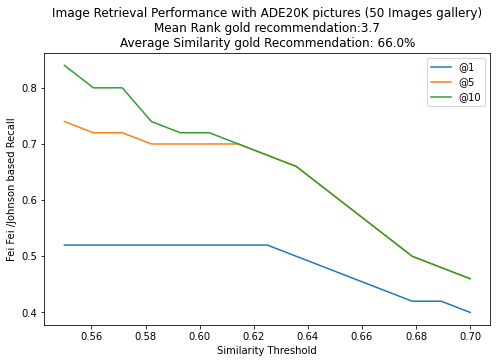

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/catr_captions_query_feifei_johnson_recall.csv


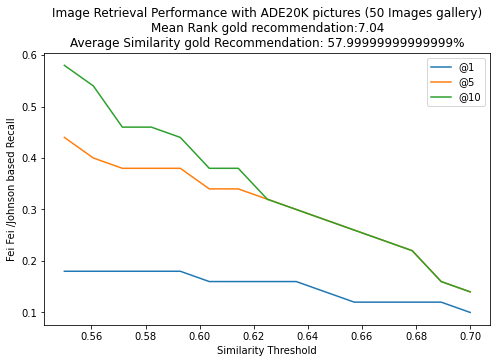

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/merged_human_caption_catr_captions_query_feifei_johnson_recall.csv


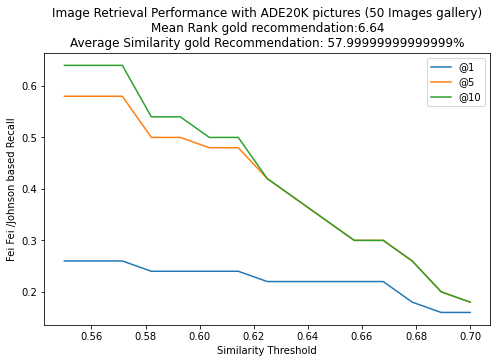

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/merged_sequences_catr_captions_query_feifei_johnson_recall.csv


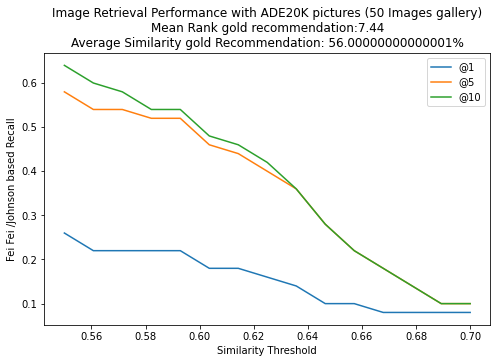

In [83]:
for query_type in query_type_list:
    file_name = eval_name(query_type, fei_fei_recall)
    df = read_frame(file_name)
    plot_recall(df, y_label=feifei_recall_label)

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/human_captions_query_ade20k_category_recall.csv


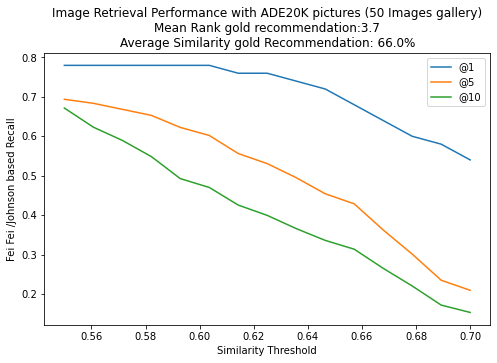

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/catr_captions_query_ade20k_category_recall.csv


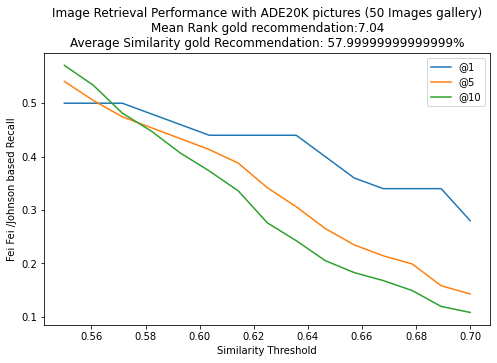

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/merged_human_caption_catr_captions_query_ade20k_category_recall.csv


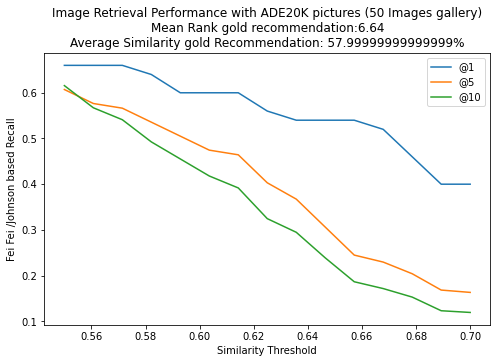

Opening: /home/rafi/PycharmProjects/clp-sose21-pm-vision/results/image_retrieval/merged_sequences_catr_captions_query_ade20k_category_recall.csv


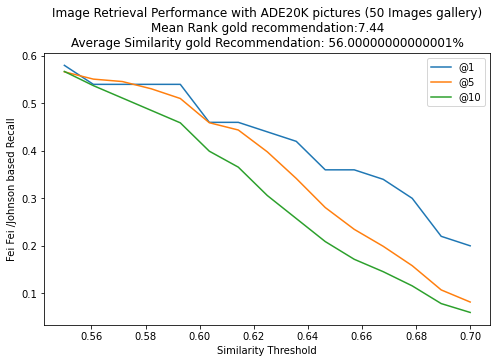

In [84]:
for query_type in query_type_list:
    file_name = eval_name(query_type, ade20k_category_recall)
    df = read_frame(file_name)
    plot_recall(df, y_label=feifei_recall_label)
# Explanation why the recall @10 and @20 are the same? Short answer: the gallery for retrieval is just too small 
# Long Answer:
# Well, we only consider certains values over a threshold
# but we also consider as relevant the number of a given category for a test.
# for example if I only have the 5 images of a bathroom , if I consider recall at 10 or 20, it doesn't matter much, 
# all the relevant have been picked during the recall @5 it does not influence the score at 10 or 20, as we can't
# retrieve 10 or 20 bathroom pictures. The only to see other differences would be to set higher threshold values.